**Credit Card Fraud Detection:**

In [48]:
 # Importing necessary packages
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer

In [49]:
# Reading data from google drive
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**In the above result all the variables are scaled but Time and Amount variables are not scaled. We have to taken care of that part later**

In [51]:
data.shape

(284807, 31)

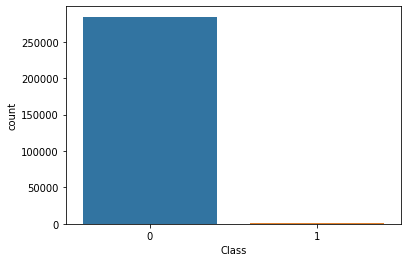

In [52]:
sns.countplot('Class',data=data)

**From the above bar plot it is evident that fraud cases are very less**

In [53]:
#Finding the distribution of classes
classes=data['Class'].value_counts()
normal_share=classes[0]/data['Class'].count()*100
fraud_share=classes[1]/data['Class'].count()*100
print('Normal Class Share',normal_share)
print('Fraud Class Sahre',fraud_share)

Normal Class Share 99.82725143693798
Fraud Class Sahre 0.1727485630620034


In [54]:
# Lets' check the quality of data with percentage of missing values
round(100*data.isnull().sum()/len(data),2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

So, from the above results we can see that there is no missing values in the given data

**Exploratory Data Analysis**

In [55]:
# Function to plot numerical variable
def numerical_variable(df,col):
    sns.FacetGrid(data=df,col='Class',aspect=2,height=3).map(sns.distplot,col)

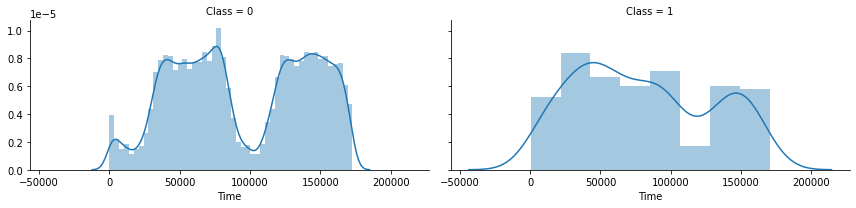

In [56]:
numerical_variable(data,'Time')

from the above graphs Time (Number of seconds elapsed between this transaction and the first transaction in the dataset) has dip at 100000 seconds for real transactions and there is a dip at beyond 1lakhs and 1.5 lakh between for fraud transactions.

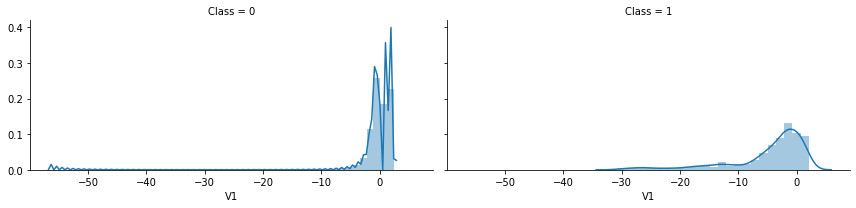

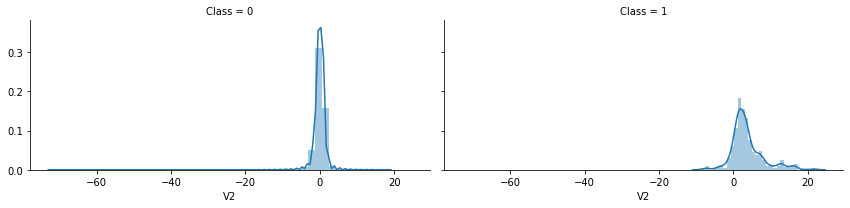

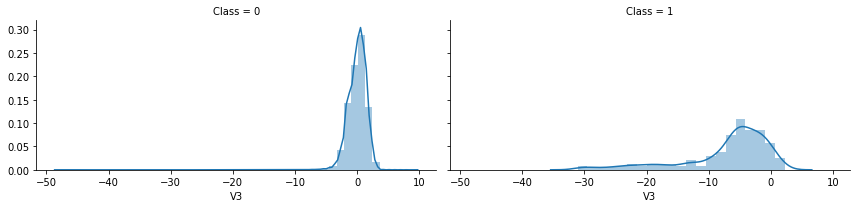

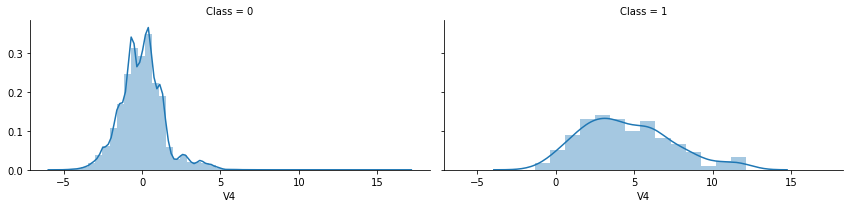

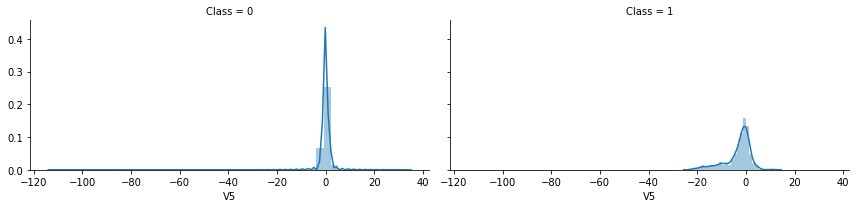

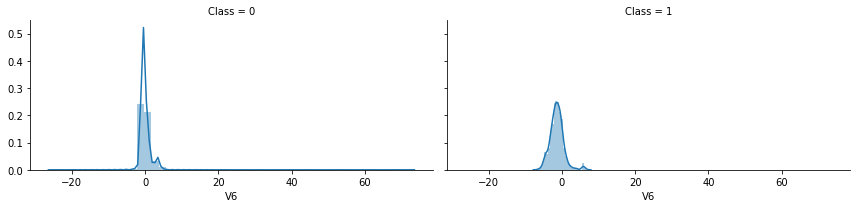

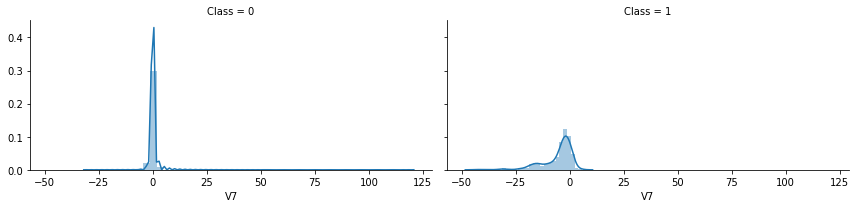

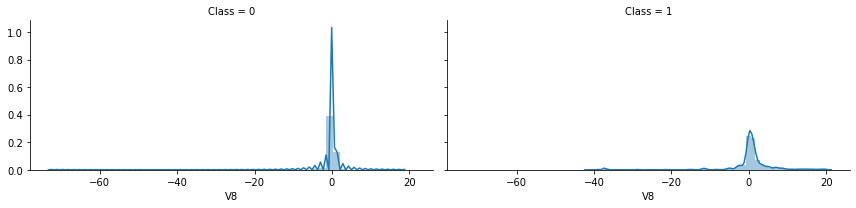

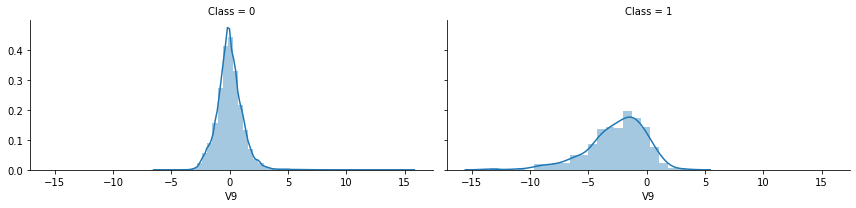

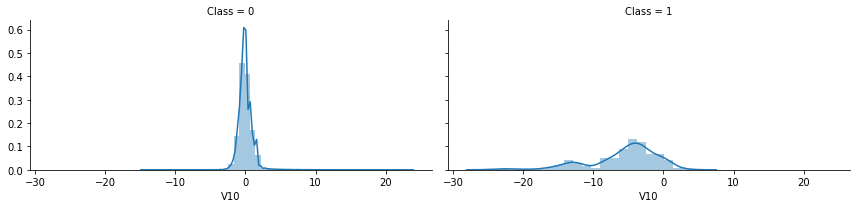

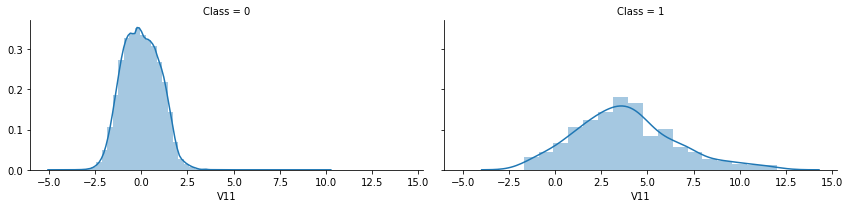

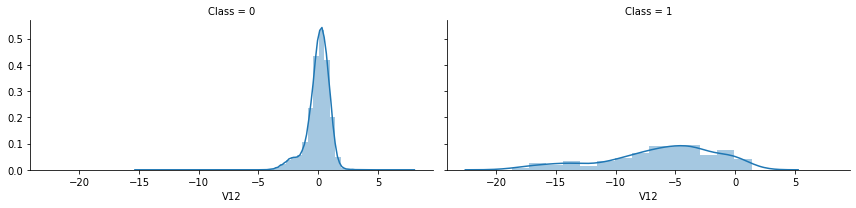

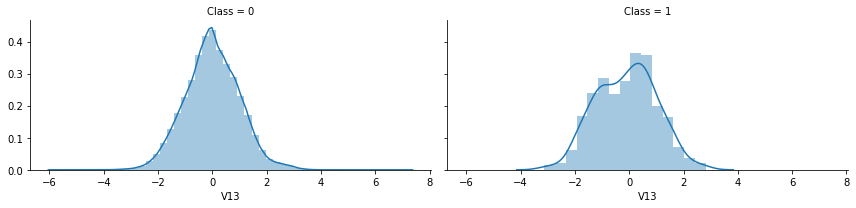

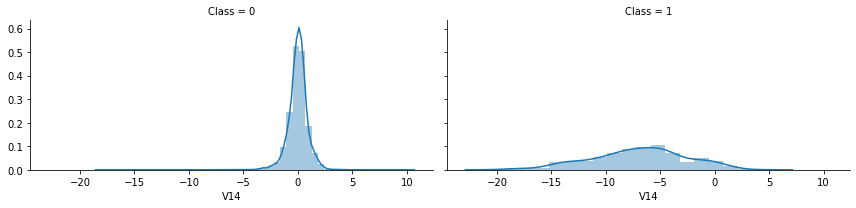

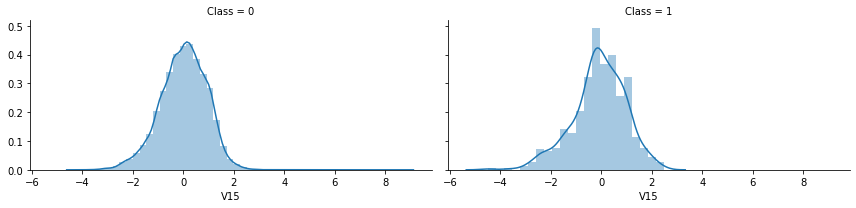

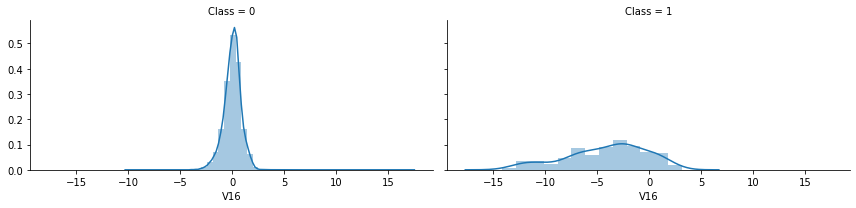

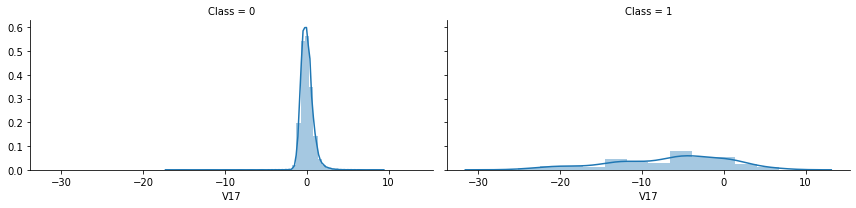

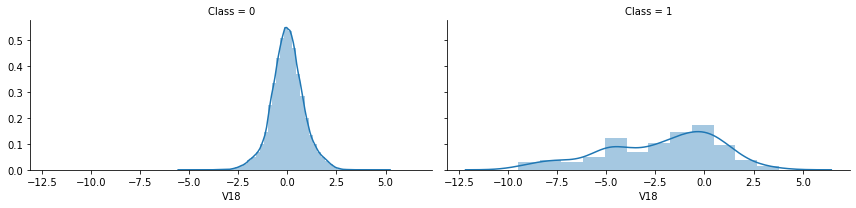

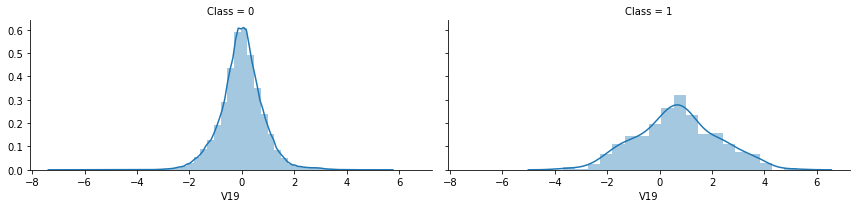

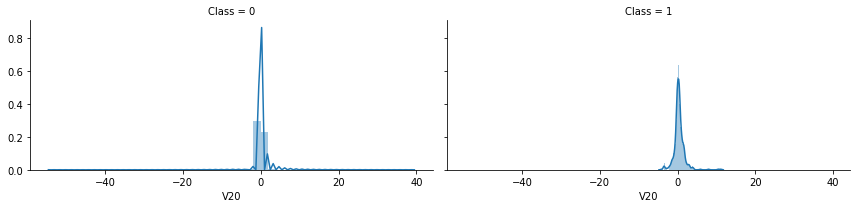

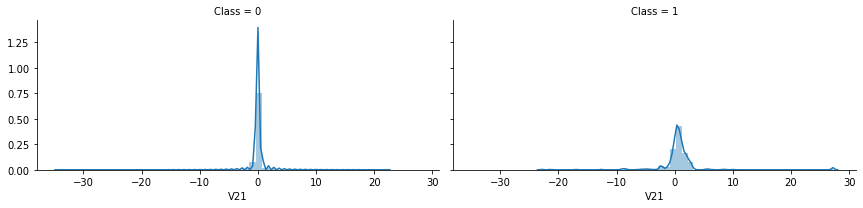

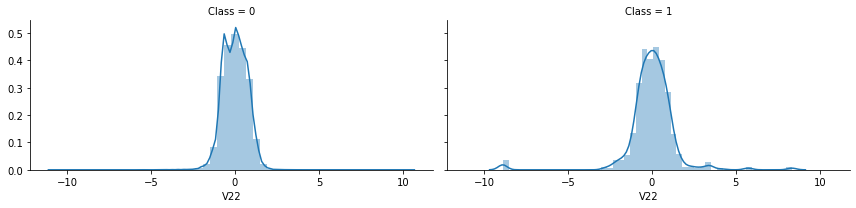

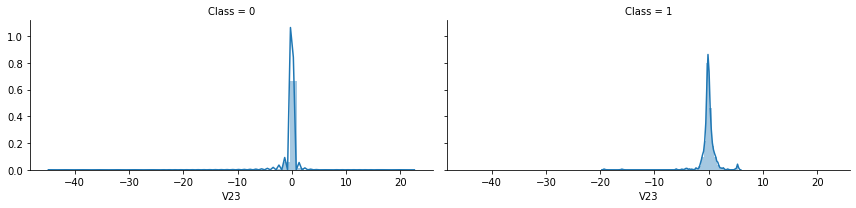

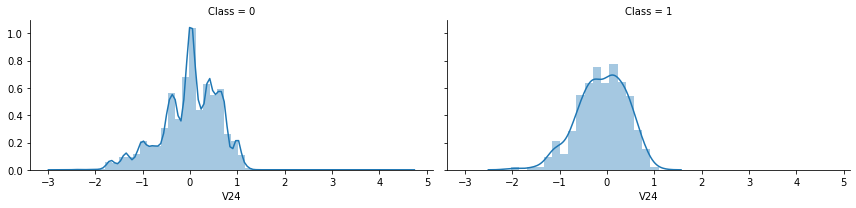

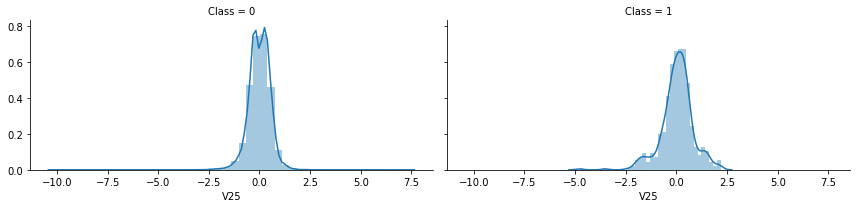

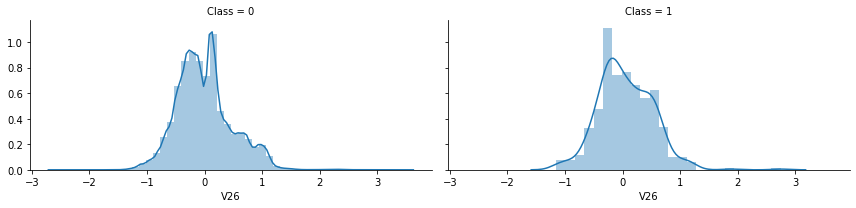

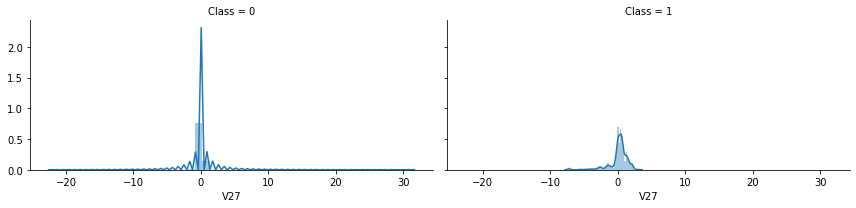

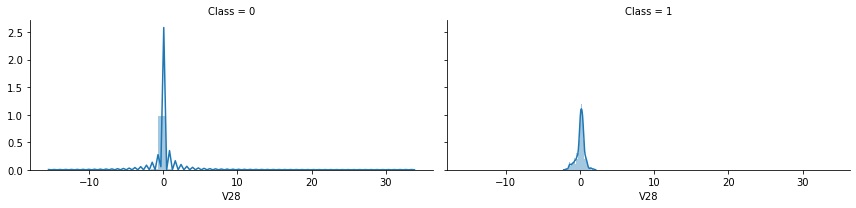

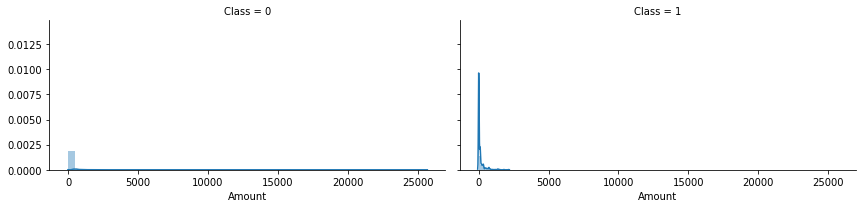

In [57]:
# Plotting for other columns through loop
for i in data.columns[1:-1]:
    numerical_variable(data,i) 

From the above graphs all the variables are almost distributed normally

In [58]:
# Separating fraud time and Amount
fraud_data = data.loc[data['Class']==1]

In [59]:
fraud_data[['Time','Amount']].describe()

,Time,Amount
count,492.000000,492.000000
mean,80746.806911,122.211321
std,47835.365138,256.683288
min,406.000000,0.000000
25%,41241.500000,1.000000
50%,75568.500000,9.250000
75%,128483.000000,105.890000
max,170348.000000,2125.870000


**From above describe function max amount of fraud is 2125 and max amount of 
time is 170348 seconds**

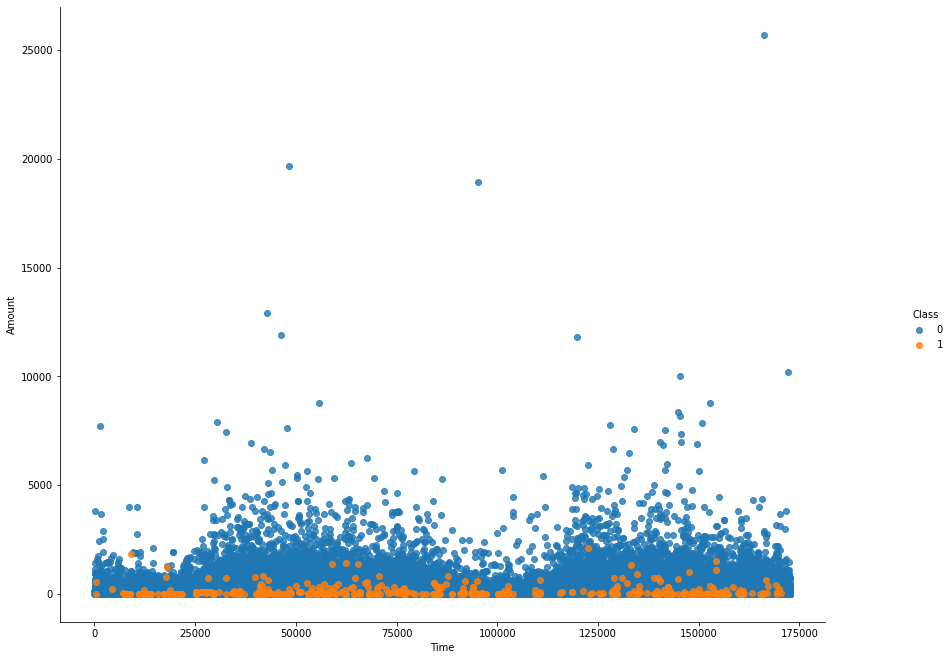

In [60]:
#Plotting Scatter plot of Time Vs Amount with Class variable
sns.lmplot('Time', 'Amount', data, hue='Class', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

From the above scatter plot between **Time vs Amount** we can see that  Fraud is happening for low amount and its max time is less than 175000 seconds



1.   **Finding Outliers**




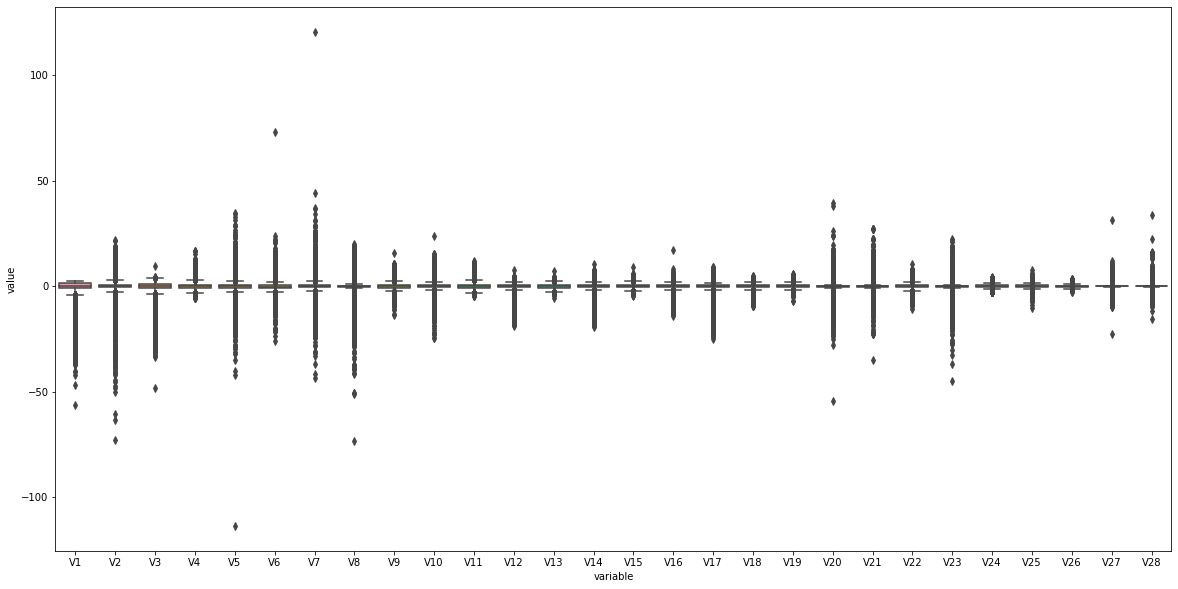

In [61]:
plt.figure(figsize=(20,10))
sns.boxplot(x="variable", y="value", data=pd.melt(data.iloc[:,1:-2]))

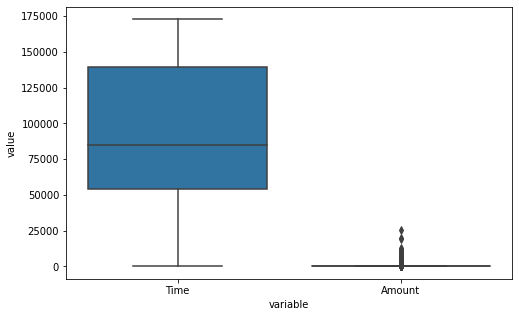

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x="variable", y="value", data=pd.melt(data[['Time','Amount']]))

**Data check by removing the outliers**

In [63]:
# Finding IQR for all the variables
Q1 = data.quantile(0.03)
Q3 = data.quantile(0.97)
IQR = Q3 - Q1
print(IQR.head())

Time    155498.640000
V1           5.991170
V2           4.942464
V3           5.117893
V4           5.729317
dtype: float64


In [64]:
# Removing the outliers
df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
# Finding the Class variables value counts after the outlier removal
df['Class'].value_counts()

0    276637
Name: Class, dtype: int64



1.   **From the above result we can see that after removing the outliers there is no fraud cases exist in the remaining data.**
2.   **Even though we set Q1 and Q3 at 3% adn 97% but still we are losing all the fraud cases. So its better to keep all the values instead of eliminating outliers**



In [66]:
# Applying power transformation to the variables to make data more Gaussian. 
pt = PowerTransformer()
data[['V1','Time','Amount']] = pt.fit_transform(data[['V1','Time','Amount']])

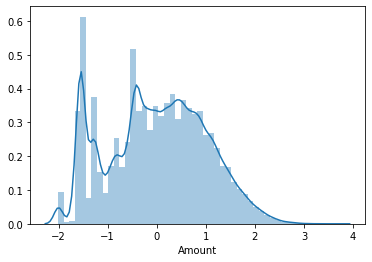

In [67]:
sns.distplot(data['Amount'])

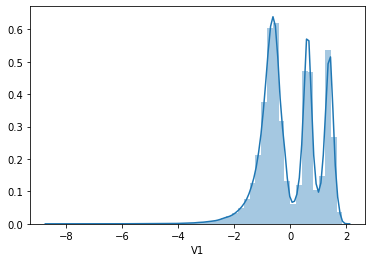

In [68]:
sns.distplot(data['V1'])

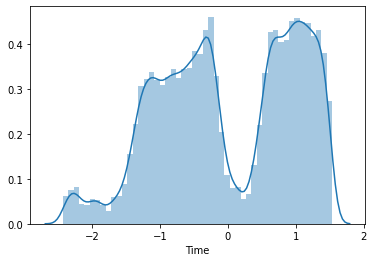

In [69]:
sns.distplot(data['Time'])

In [70]:
# Dropping Time variable as it is not giving any value to the analysis
data = data.drop(['Time'],axis=1)

In [71]:
# Train and Test splitting
from sklearn.model_selection import train_test_split
X = data.drop(['Class'],axis=1)
y = data['Class']

# Splitting with Stratified 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100,stratify=y)

# Splitting Train for Cross Validation
X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X_train, y_train, train_size=0.7, test_size=0.3, random_state=100,stratify=y_train)


**Model Building without balancing the dataset**

**Logistic Regression:**

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test))

Accuracy of logistic regression classifier on train set: 1.00
Accuracy of logistic regression classifier on test set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.61      0.70       148

    accuracy                           1.00     85443
   macro avg       0.91      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



Without balancing the dataset, we got good results with Logistic Regression with 100% predicting non fraud and 61% predicting fradulant transactions by using Recall

**Hyper Parameter Tuning**

In [73]:
#Implementing Grid Search
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.9836, with best C: {'C': 0.001}


In [74]:
kf = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression(C=0.001)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1


1 of KFold 10
ROC AUC score: 0.7958656098905517
2 of KFold 10
ROC AUC score: 0.7550844549975307
3 of KFold 10
ROC AUC score: 0.7550844549975307
4 of KFold 10
ROC AUC score: 0.6938072077452253
5 of KFold 10
ROC AUC score: 0.744810030089695
6 of KFold 10
ROC AUC score: 0.7298241356266048
7 of KFold 10
ROC AUC score: 0.8099296542506419
8 of KFold 10
ROC AUC score: 0.7754398583322745
9 of KFold 10
ROC AUC score: 0.8366643481281929
10 of KFold 10
ROC AUC score: 0.7754750312069536


**Receiver Operating Characteristics Curve**

Text(0.5, 0, 'False positive rate')

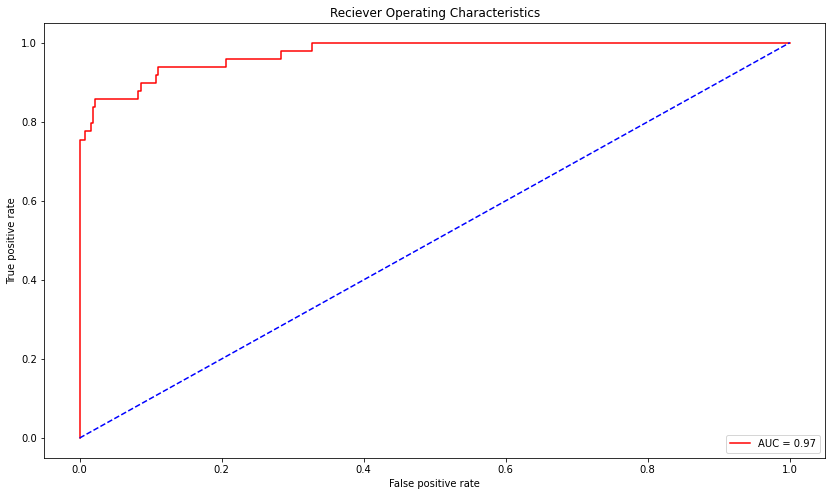

In [75]:
proba = lr.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

We got AUC of 97 % which is really good


**Random Forest:**

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(warm_start=True,n_jobs=-1)

rfc.fit(X_train,y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
print('Accuracy of RandomForest classifier on train set: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test))

Accuracy of RandomForest classifier on train set: 1.00
Accuracy of RandomForest classifier on test set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



With Random Forest we got recall 100% to predict non fradulent cases and 76% to predict the fradulent cases.

**Applying class balancing Techniques**

**SMOTE Implementation:**

In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=12)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [78]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [79]:
np.unique(y_train_smote, return_counts=True)

(array([0, 1]), array([199020, 199020]))

After applying SMOTE both classes are balanced with the 199020 count

**Logistic Regression:**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_smote,y_train_smote)
y_pred_train = logreg.predict(X_train_smote)
y_pred_test = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train_smote, y_train_smote)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test))

Accuracy of logistic regression classifier on train set: 0.95
Accuracy of logistic regression classifier on test set: 0.98
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



After balancing the dataset with SMOTE technique. Recall for Logistic Regression we are getting 98% for non-fraud transactions and 89% for fraud transactions.

**Hyper parameter tuning:**

In [81]:
#Implementing Grid Search
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X_train_smote,y_train_smote)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.9907, with best C: {'C': 20}


In [82]:
kf = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression(C=20)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1


1 of KFold 10
ROC AUC score: 0.8162034298806748
2 of KFold 10
ROC AUC score: 0.8061048631607961
3 of KFold 10
ROC AUC score: 0.7856791140766943
4 of KFold 10
ROC AUC score: 0.7958304382529602
5 of KFold 10
ROC AUC score: 0.7958304382529602
6 of KFold 10
ROC AUC score: 0.7698417220639443
7 of KFold 10
ROC AUC score: 0.8299296542506419
8 of KFold 10
ROC AUC score: 0.8162737713002263
9 of KFold 10
ROC AUC score: 0.8570549249561596
10 of KFold 10
ROC AUC score: 0.8162913577375659


Text(0.5, 0, 'False positive rate')

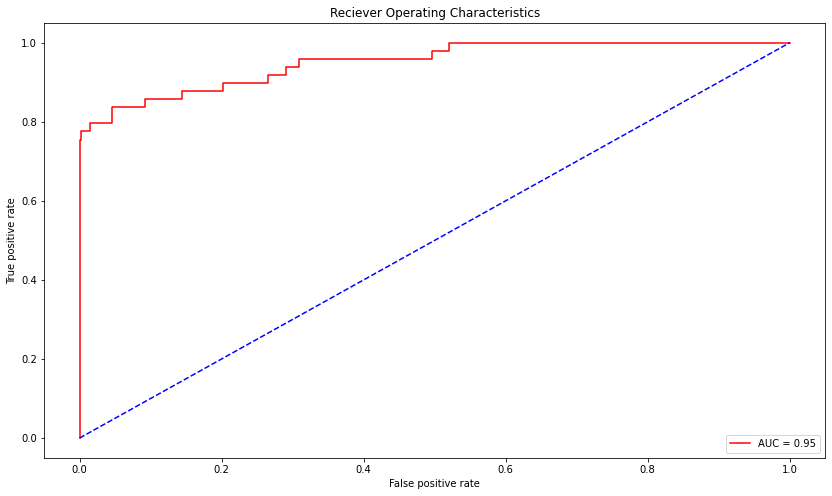

In [83]:
proba = lr.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

We got AUC of 95% which is really good after tuning

**Random Forest:**

In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(warm_start=True,n_jobs=-1)

rfc.fit(X_train_smote,y_train_smote)
y_pred_train = rfc.predict(X_train_smote)
y_pred_test = rfc.predict(X_test)
print('Accuracy of RandomForest classifier on train set: {:.2f}'.format(rfc.score(X_train_smote, y_train_smote)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test))

Accuracy of RandomForest classifier on train set: 1.00
Accuracy of RandomForest classifier on test set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.82      0.86       148

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



Here with balancing data random forest is 100% able to predict the fraudulent transactions and 82% of the time it can predict non-fradulent transactions by using recall

**Adasyn Implementation:**

In [85]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=12)
X_train_res, y_train_res = adasyn.fit_sample(X_train, y_train)

In [86]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [87]:
np.unique(y_train_res, return_counts=True)

(array([0, 1]), array([199020, 199024]))

**Logistic Regression:**

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_res,y_train_res)
y_pred_train = logreg.predict(X_train_res)
y_pred_test = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train_res, y_train_res)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test))

Accuracy of logistic regression classifier on train set: 0.90
Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       1.00      0.91      0.96     85295
           1       0.02      0.93      0.04       148

    accuracy                           0.91     85443
   macro avg       0.51      0.92      0.50     85443
weighted avg       1.00      0.91      0.95     85443



Now we have implemented logistc regression on balanced data using Adasyn. Here we got recall of 91% for non-fraudelent cases adn 93% for fradulent cases.

In [89]:
kf = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression()
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1


1 of KFold 10
ROC AUC score: 0.8162034298806748
2 of KFold 10
ROC AUC score: 0.8061048631607961
3 of KFold 10
ROC AUC score: 0.7856791140766943
4 of KFold 10
ROC AUC score: 0.7856263566203071
5 of KFold 10
ROC AUC score: 0.7958304382529602
6 of KFold 10
ROC AUC score: 0.7698417220639443
7 of KFold 10
ROC AUC score: 0.8299296542506419
8 of KFold 10
ROC AUC score: 0.8162737713002263
9 of KFold 10
ROC AUC score: 0.8570549249561596
10 of KFold 10
ROC AUC score: 0.8162913577375659


Text(0.5, 0, 'False positive rate')

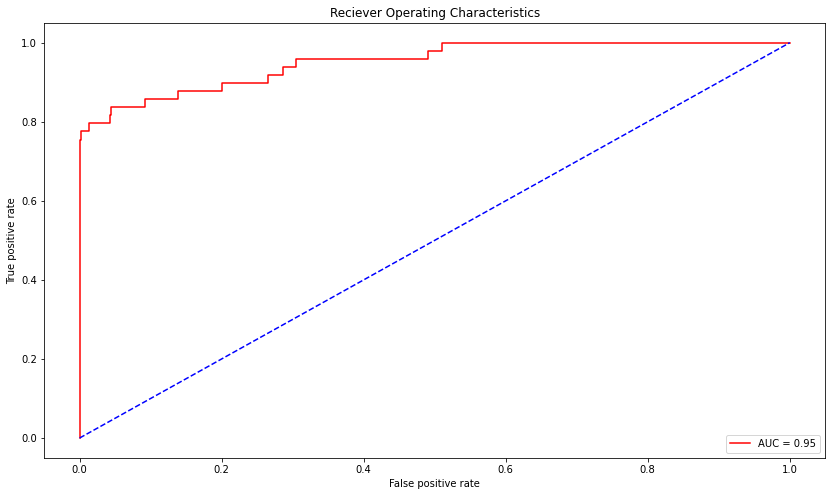

In [90]:
proba = lr.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

We got good AUC value of 95%

**Random Forest:**

In [91]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(warm_start=True,n_jobs=-1)

rfc.fit(X_train_res,y_train_res)
y_pred_train = rfc.predict(X_train_res)
y_pred_test = rfc.predict(X_test)
print('Accuracy of RandomForest classifier on train set: {:.2f}'.format(rfc.score(X_train_res, y_train_res)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test))

Accuracy of RandomForest classifier on train set: 1.00
Accuracy of RandomForest classifier on test set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.81      0.85       148

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



Random forest on balanced dataset using ADASYN is giving recall of 100% for non-fradulent transactions and 82% for fradulent transactions.

In [92]:
kf = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    rfc = RandomForestClassifier(warm_start=True,n_jobs=-1)
    rfc.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = rfc.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1


1 of KFold 10
ROC AUC score: 0.8264250973321235
2 of KFold 10
ROC AUC score: 0.8061048631607961
3 of KFold 10
ROC AUC score: 0.7958831957093474
4 of KFold 10
ROC AUC score: 0.8060345198856133
5 of KFold 10
ROC AUC score: 0.7958304382529602
6 of KFold 10
ROC AUC score: 0.7598417220639443
7 of KFold 10
ROC AUC score: 0.839929654250642
8 of KFold 10
ROC AUC score: 0.8366819345655325
9 of KFold 10
ROC AUC score: 0.8570549249561596
10 of KFold 10
ROC AUC score: 0.8162913577375659


Text(0.5, 0, 'False positive rate')

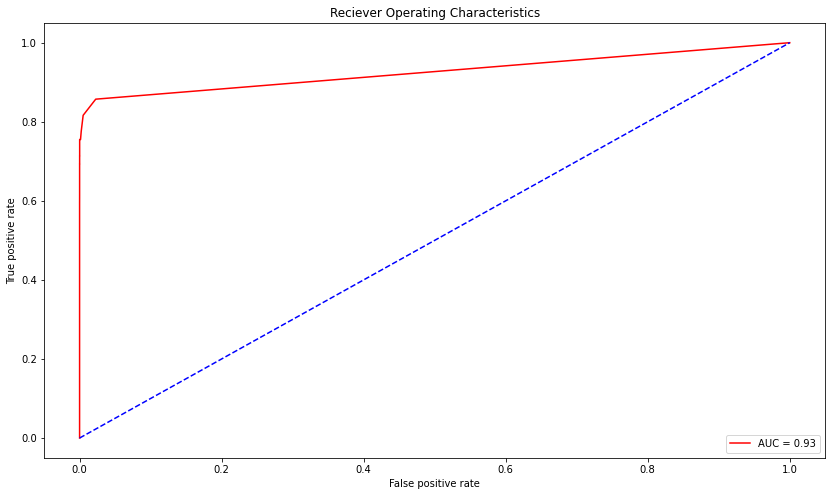

In [93]:
proba = rfc.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

We got 91% AUC for Random Forest which is really good but not much compare to Logistic Regression

**ADA Boost:**

In [94]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(random_state=100)

In [95]:
adb.fit(X_train_res,y_train_res)
y_pred_train = adb.predict(X_train_res)
y_pred_test = adb.predict(X_test)
print('Accuracy of Adaboost classifier on train set: {:.2f}'.format(adb.score(X_train_res, y_train_res)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'.format(adb.score(X_test, y_test)))

# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test))

Accuracy of Adaboost classifier on train set: 0.96
Accuracy of Adaboost classifier on test set: 0.95
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.90      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.95      0.98     85443



After implementing ADABoost we got recall of 95% for non-fradulent cases and 90% for fradulent cases.

In [96]:
kf = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    adb = AdaBoostClassifier(random_state=100)
    adb.fit(xtr,ytr)
    score = roc_auc_score(yvl,adb.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = rfc.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1


1 of KFold 10
ROC AUC score: 0.8570725138676742
2 of KFold 10
ROC AUC score: 0.887649587128042
3 of KFold 10
ROC AUC score: 0.8672765955003272
4 of KFold 10
ROC AUC score: 0.8059993482480218
5 of KFold 10
ROC AUC score: 0.8569845847736957
6 of KFold 10
ROC AUC score: 0.8097186170025676
7 of KFold 10
ROC AUC score: 0.8898768949386233
8 of KFold 10
ROC AUC score: 0.8467453246994693
9 of KFold 10
ROC AUC score: 0.857002165644141
10 of KFold 10
ROC AUC score: 0.805893825294178


Text(0.5, 0, 'False positive rate')

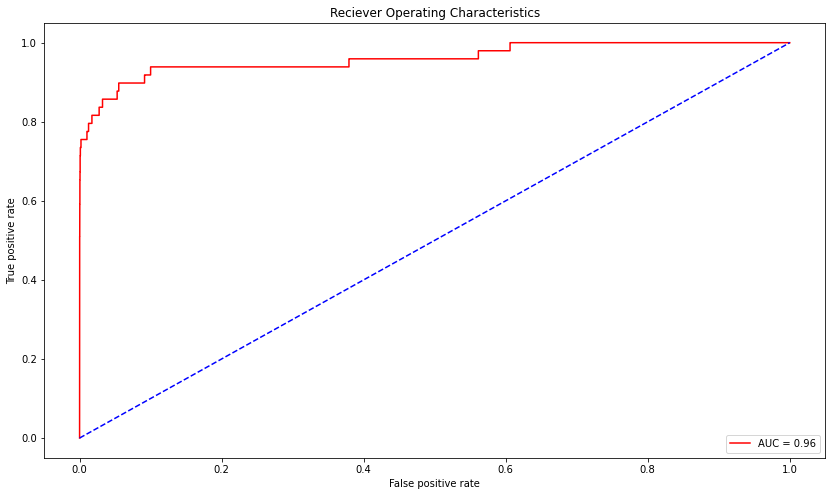

In [97]:
proba = adb.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

We got 96% of ROC which is very good

**Summary:**

We have implemented Logistic Regression, Random Forest, Adaboost classifier models and due to computational power we limited to few models only.


1.   In the First phase we have implemented Logistic Regression and Random Forest with Cross validations also without balancing the dataset
2.   In the Second phase we have balanced the dataset using SMOTE technique and implemeted Logistic and Randomforest with grid search
3.   In the Third phase we have balanced the dataset using ADASYN technique and implemented Logistic, Random Forest and ADA Boost Classifier



*   Out of all the models we have implemented, few of them got overfitted and biased towards non-fradulent cases.
*   **Ada boost classifier** gives us the good accuracy on Train set with 96% and Test set with 95%. 
*   We got recall of 95% for non-fradulent cases and 90% for fradulent cases.
*   We got AUC-ROC of 96% which is also very good. 
*   So finally we can conclude **AdaBoost Classifier** is giving better results to find the fradulent transactions in this scenario.



